In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('./Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
to_drop = ['RowNumber','CustomerId','Surname']

In [4]:
data.drop(columns=to_drop, inplace=True)

In [5]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
le = LabelEncoder()

In [7]:
data['Gender'] = le.fit_transform(data['Gender'])

In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data = pd.get_dummies(data=data, drop_first=True)

In [10]:
data = data[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
       'Geography_Germany', 'Geography_Spain', 'Exited']].copy()

In [11]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
sc = StandardScaler()

In [15]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
model = Sequential()

In [17]:
model.add(tf.keras.Input(shape=(11,)))
model.add(Dense(6, activation='relu', kernel_initializer='uniform'))
model.add(Dense(6, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.4963 - accuracy: 0.7959
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8207
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4121 - accuracy: 0.8335
Epoch 5/100
800/800 [==============================] - 1s 997us/step - loss: 0.4080 - accuracy: 0.8341
Epoch 6/100
800/800 [==============================] - 1s 991us/step - loss: 0.4054 - accuracy: 0.8341
Epoch 7/100
800/800 [==============================] - 1s 999us/step - loss: 0.4033 - accuracy: 0.8346
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4021 - accuracy: 0.8346
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4007 - accuracy: 0.8347
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3993 - 

800/800 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8600
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3384 - accuracy: 0.8594
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 0.8611
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8606
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8621
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3382 - accuracy: 0.8611
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3386 - accuracy: 0.8608
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8596
Epoch 89/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8611
Epoch 90/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3379 - accuracy: 

In [20]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [21]:
y_pred = (y_pred>0.5)

In [22]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [24]:
matrix  = confusion_matrix(y_test, y_pred)

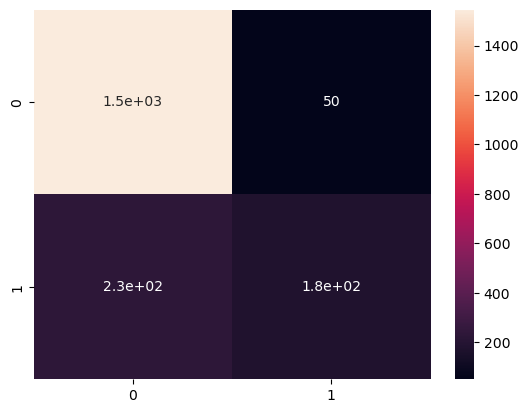

In [25]:
sns.heatmap(matrix, annot=True);